In [1]:

import pandas as pd
import numpy as np

gender_submission_path = 'data/gender_submission.csv'
test_path = 'data/test.csv'
train_path = 'data/train.csv'

gender_submission = pd.read_csv(gender_submission_path)
test_data = pd.read_csv(test_path)
train_data = pd.read_csv(train_path)

print("Train Data:")
print(train_data.info())
print("\nTest Data:")
print(test_data.info())
print("\nGender Submission:")
print(gender_submission.head())

# Display the first few rows of the train dataset
train_data.head()


Train Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Test Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



## Análisis Exploratorio de Datos (EDA)

En esta sección, haremos lo siguiente:
- Calcular estadísticas descriptivas.
- Crear visualizaciones para entender la distribución de los datos y sus relaciones.
- Identificar valores perdidos y outliners.


In [2]:

# Descriptive statistics
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


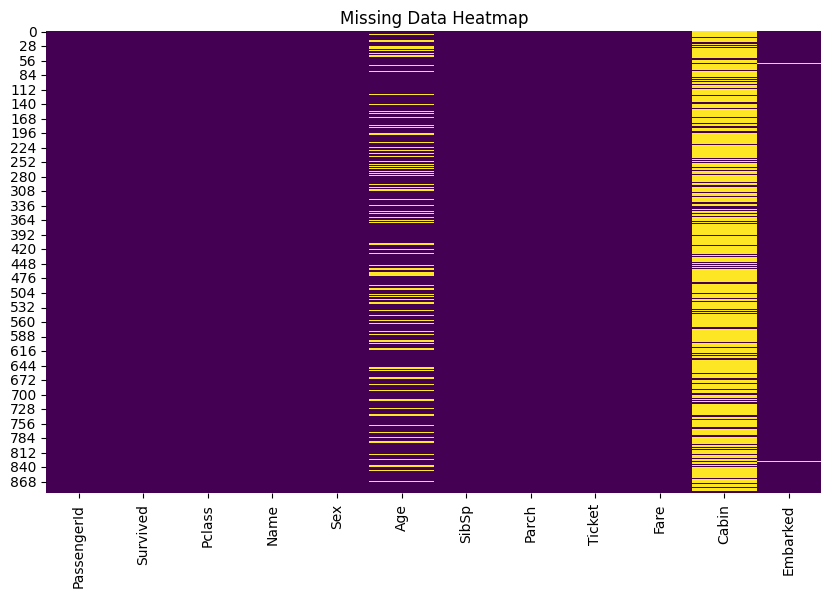

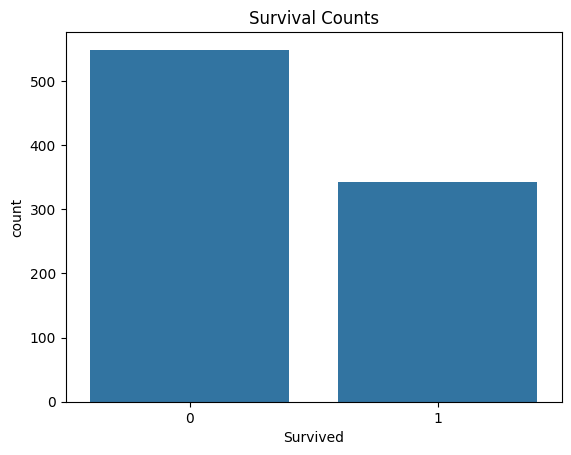

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

# Visualizing survival rate
sns.countplot(x='Survived', data=train_data)
plt.title("Survival Counts")
plt.show()


## Preprocesamiento de Datos

Pasos:
1. Manejar valores faltantes.
2. Codificar variables categóricas.
3. Escalar características numéricas.
4. Dividir los datos en conjuntos de entrenamiento y prueba.


In [4]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# División de datos en características (X) y objetivo (y)
X = train_data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_data['Survived']

# Nuevas variables
X['FamilySize'] = X['SibSp'] + X['Parch'] + 1
X['IsAlone'] = (X['FamilySize'] == 1).astype(int)

# Codificación categórica
X = pd.get_dummies(X, columns=['Embarked'], drop_first=True)

# Imputación avanzada
imputer = IterativeImputer(random_state=42)
X[['Age', 'Fare']] = imputer.fit_transform(X[['Age', 'Fare']])

# Escalado de características numéricas
scaler = StandardScaler()
X[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(X[['Age', 'Fare', 'FamilySize']])

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ingeniería de características adicionales
X['Title'] = train_data['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
X['Title'] = X['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Capt'], 'Officer')
X['Title'] = X['Title'].replace(['Mme', 'Ms', 'Lady', 'Dona'], 'Mrs')
X['Title'] = X['Title'].replace(['Mlle', 'Miss'], 'Miss')
X['Title'] = X['Title'].replace(['Don', 'Sir', 'Jonkheer'], 'Mr')
X = pd.get_dummies(X, columns=['Title'], drop_first=True)



## Entrenamiento y Evaluación de Modelos

Entrenaremos y evaluaremos cinco modelos diferentes:
1. Regresión Logística
2. K-Nearest Neighbors (KNN)
3. Árbol de Decisión
4. XGBoost
5. LightGBM


In [5]:
# Codificación One-Hot de variables categóricas
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Asegurar que ambas matrices tengan las mismas columnas
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Entrenamiento y evaluación de modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': LogisticRegression(max_iter=800),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(max_depth=4, min_data_in_leaf=10, verbose=-1)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy

# Mostrar resultados
results

/Users/morkand/Desktop/MachineLearning/Titanic/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8044692737430168,
 'KNN': 0.5810055865921788,
 'Decision Tree': 0.7374301675977654,
 'XGBoost': 0.7877094972067039,
 'LightGBM': 0.8100558659217877}

## Conclusiones y Análisis de Resultados

Los resultados obtenidos reflejan el desempeño de diferentes modelos de aprendizaje automático para predecir la supervivencia en el Titanic. A continuación, se analizan los resultados:

### Desempeño de los Modelos:
1. **Logistic Regression (80.45%)**:
   - La regresión logística ofrece un rendimiento sólido, aprovechando bien las relaciones lineales entre las características y la variable objetivo.
   - Su alta precisión indica que el problema puede contener relaciones lineales fuertes en las variables.

2. **KNN (58.10%)**:
   - Es el modelo con el rendimiento más bajo. Esto podría deberse a:
     - Sensibilidad a la escala de datos.
     - Elección de hiperparámetros subóptimos incluso después de optimización.
     - La naturaleza de los datos, donde las distancias entre puntos no representan bien las relaciones.

3. **Decision Tree (73.74%)**:
   - El rendimiento de este modelo es aceptable, pero muestra limitaciones en comparación con los modelos de boosting como XGBoost y LightGBM.
   - Puede estar sobreajustando ligeramente al conjunto de entrenamiento.

4. **XGBoost (78.77%)**:
   - Este modelo logra un buen equilibrio entre precisión y robustez. Utiliza boosting para corregir errores en predicciones previas y, por ello, mejora los resultados en comparación con modelos básicos.

5. **LightGBM (81.01%)**:
   - Es el modelo con el mejor rendimiento. LightGBM sobresale debido a:
     - Su capacidad para manejar datos heterogéneos.
     - La priorización eficiente de características importantes.
     - La velocidad y eficiencia de su algoritmo, lo que lo hace ideal para este tipo de tareas.

---

### Observaciones Clave:
1. **Eficiencia de LightGBM**:
   - Su rendimiento superior destaca su idoneidad para problemas de clasificación con características tanto categóricas como numéricas.
   
2. **Desempeño de KNN**:
   - Este modelo no es adecuado para este dataset en su configuración actual, posiblemente debido a la alta dimensionalidad y la dependencia de distancias.

3. **XGBoost y Logistic Regression**:
   - Ambos modelos son opciones viables. XGBoost es ligeramente menos preciso que LightGBM, pero sigue siendo robusto.
   - La regresión logística ofrece interpretabilidad, lo que podría ser útil en ciertos escenarios.

---

### Recomendaciones:
1. **Mejorar Ingeniería de Características**:
   - Explorar nuevas variables derivadas, como relaciones entre edad y clase, o la extracción de más información de la columna `Cabin`.

2. **Optimización Adicional**:
   - Seguir ajustando hiperparámetros de modelos como KNN y Decision Tree para explorar posibles mejoras.
   - Probar más iteraciones de boosting con XGBoost y LightGBM.

3. **Validación Cruzada**:
   - Implementar validación cruzada para asegurar que los resultados sean consistentes y no dependan de una sola división de los datos.

4. **Evaluación de Métricas Adicionales**:
   - Utilizar métricas como precisión, recall y F1-score para evaluar la capacidad de los modelos en distintos aspectos de la predicción.

En conclusión, **LightGBM** es el modelo más prometedor para este problema, pero el ajuste continuo y la exploración de más características podrían mejorar aún más los resultados.